In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3. +np.random.normal(0, 10., size = 100)

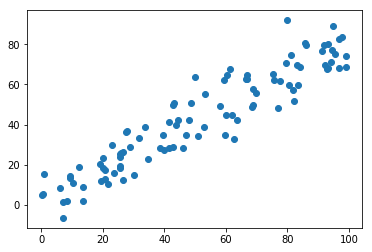

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
def demean(X):
    return X - np.mean(X, axis = 0)

In [5]:
 X_demean = demean(X)

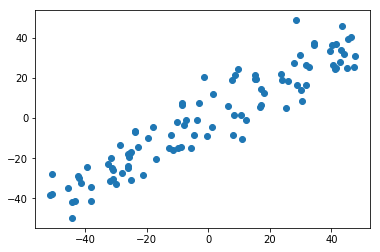

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

# 梯度上升法

In [7]:
def f(w, X):
    return np.sum((X.dot(w) ** 2) / len(X))

In [8]:
def df_math(w, X):
    return X.T.dot(X.dot(w))* 2. / len(X)

In [9]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, epsilon = 1e-8, n_iters = 1e4):
    cur_iter = 0
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) #每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1

    return w

In [10]:
initial_w = np.random.random(X.shape[1]) #不能用0向量开始
initial_w

array([0.76181181, 0.86097077])

In [11]:
eta = 0.001

In [12]:
#不能使用StandardScaler

In [13]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
w

array([-0.77264621, -0.63483685])

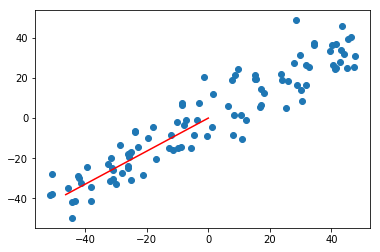

In [14]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*60], [0, w[1]*60], color = 'r')
plt.show()